# COMP 3610 – A3

- Zidane Timothy, Maia Neptune, Christophe Gittens

In [1]:
# %pip install numpy
# %pip install datasets

In [2]:
from pathlib import Path
import os
import tarfile
import pandas as pd
import shutil
import glob

import time, matplotlib.pyplot as plt, seaborn as sns, matplotlib.ticker as ticker
import numpy as np


from datasets import load_dataset, load_from_disk
from pathlib import Path
import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime
import json

Load clean and merge respective partioned categories

In [3]:
import os
import dask.dataframe as dd

def load_all_parquet(parquet_directory):
    parquet_files = [os.path.join(parquet_directory, f) for f in os.listdir(parquet_directory) if f.endswith(".parquet")]
    
    if not parquet_files:
        raise RuntimeError("No .parquet files found.")

    print(f"Loading {len(parquet_files)} parquet files with Dask...")
    ddf = dd.read_parquet(parquet_files)
    return ddf


In [4]:
start_path = r"C:\Users\maian\Downloads\cleaned files"
all_ddf = load_all_parquet(start_path)


Loading 1 parquet files with Dask...


## Star Rating Histogram

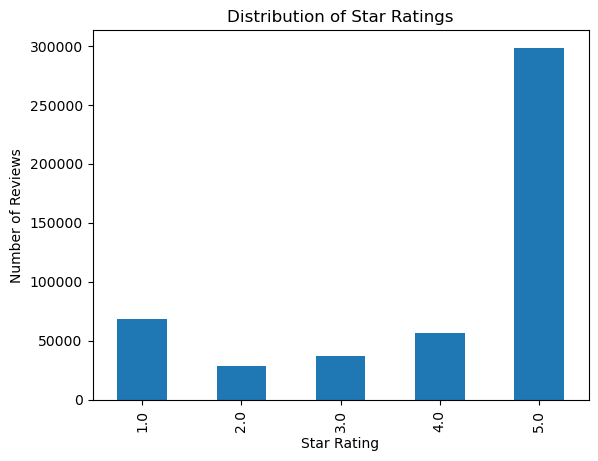

In [5]:
import matplotlib.pyplot as plt

# Star rating distribution
rating_counts = all_ddf["rating"].value_counts().compute().sort_index()
rating_counts.plot(kind="bar")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Star Ratings")
plt.show()


## Top 10 Categories

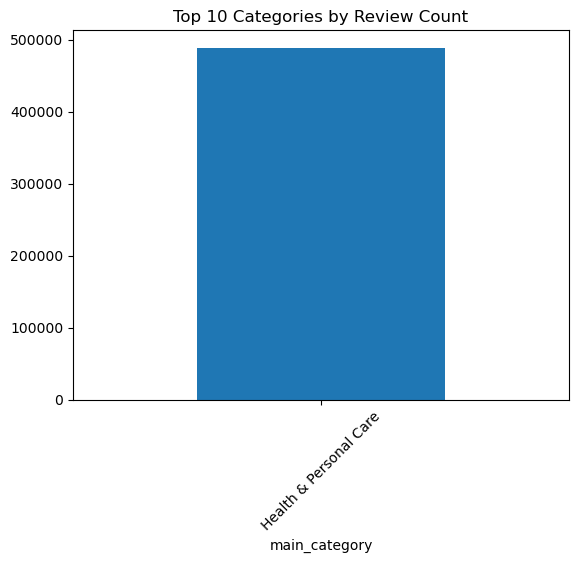

In [6]:
top_categories = all_ddf["main_category"].value_counts().nlargest(10).compute()
top_categories.plot(kind="bar")
plt.title("Top 10 Categories by Review Count")
plt.xticks(rotation=45)
plt.show()




## Top 10 Brands

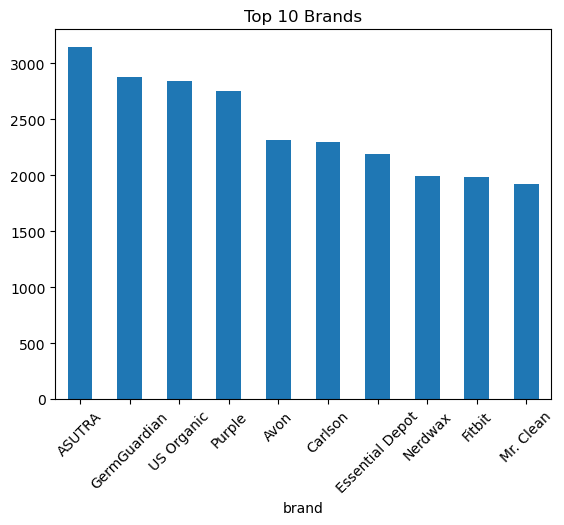

In [7]:
top_brands = all_ddf[all_ddf["brand"] != "Unknown"]["brand"].value_counts().nlargest(10).compute()
top_brands.plot(kind="bar")
plt.title("Top 10 Brands")
plt.xticks(rotation=45)
plt.show()

## Time-Based Trend

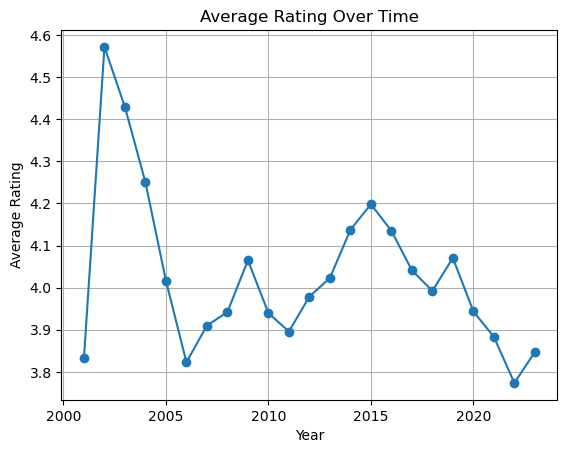

In [ ]:
# Ensure valid years only
yearly_avg = (
    all_ddf[["year", "rating"]]
    .dropna()
    .groupby("year")
    .rating.mean()
    .compute()
    .sort_index() 
)

yearly_avg.plot(kind="line", marker='o')
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Rating Over Time")
plt.grid(True)
plt.show()


## Correlation

In [9]:
subset = all_ddf[["review_length", "rating"]].dropna().sample(frac=0.1).compute()  # 10% sample
corr = subset["review_length"].corr(subset["rating"])
print(f"Pearson correlation: {corr:.4f}")


Pearson correlation: -0.0267
